In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4"]
taxa = ["Bear", "Bear", "Wolf", "Wolf", "Bear", "Bear", "Wolf", "Wolf", "Wolf"]
lims_all = [20,20,20,20,20,20,90,20,20]
lims_min = [1,2,1,0.5,0.5,5,100,0.5,0.5]

In [3]:
### total reads dict
nreads = {
"CX113C" : 100561512,
"CX113E" : 144778271,
"CX113F" : 86261578,
"CX113H" : 75801442,
"CX115H" : 120629800,
"CX1138" : 133753417,
"Neige_2_3" : 89823533,
"Neige_3_2" : 105035879,
"Neige_4" : 113481500,
"greek_wolf" : 211976429,
"slov_bear" : 198464348,
"human" : 75842697}

ndups = {
"CX113C" : 2472699,
"CX113E" : 4413344,
"CX113F" : 2115773,
"CX113H" : 2042822,
"CX115H" : 3032773,
"CX1138" : 4307403,
"Neige_2_3" : 5705317,
"Neige_3_2" : 2304170,
"Neige_4" : 2991338,
"greek_wolf" : 23380960,
"slov_bear" : 4157923,
"human" : 9698347}

In [4]:
stats_df = pd.DataFrame()

for i in range(len(samples)):
    df = pd.read_csv(f"./1ref_data/{samples[i]}.single.cov.tsv", sep='\t', header=0)
    
    df2 = pd.read_csv(f"./1ref_data/{samples[i]}.single.minq.tsv", sep='\t', header=0)

    stats_df = pd.concat([stats_df, pd.DataFrame([{"Sample": samples[i], "Species": taxa[i], "Total reads": nreads[samples[i]], "% duplicates": ndups[samples[i]]/nreads[samples[i]]*100, "% mapped all": df['numreads'].sum()/nreads[samples[i]]*100, "% unmapped all": 100-(df['numreads'].sum()/nreads[samples[i]]*100), "% mapped 30MAPQ": df2['numreads'].sum()/nreads[samples[i]]*100, "% unmapped 30MAPQ": 100-(df2['numreads'].sum()/nreads[samples[i]]*100+ndups[samples[i]]/nreads[samples[i]]*100)}])], ignore_index=True)

stats_df

,Sample,Species,Total reads,% duplicates,% mapped all,% unmapped all,% mapped 30MAPQ,% unmapped 30MAPQ
0,CX113C,Bear,100561512,2.458892,47.542355,52.457645,0.835260,96.705848
1,CX113E,Bear,144778271,3.048347,50.028722,49.971278,1.233465,95.718188
2,CX113F,Wolf,86261578,2.452741,45.650615,54.349385,0.729182,96.818077
3,CX113H,Wolf,75801442,2.694965,42.579327,57.420673,0.423313,96.881723
4,CX115H,Bear,120629800,2.514116,48.091846,51.908154,1.445692,96.040192
5,CX1138,Bear,133753417,3.220406,48.173058,51.826942,1.644069,95.135525
6,Neige_2_3,Wolf,89823533,6.351695,65.973727,34.026273,32.296375,61.351930
7,Neige_3_2,Wolf,105035879,2.193698,48.366735,51.633265,0.619975,97.186327
8,Neige_4,Wolf,113481500,2.635970,46.503984,53.496016,0.611498,96.752532


In [5]:
# Format the values in the table to 2 decimal places apart from the first three columns
table_df = stats_df
table_df.iloc[:, 3:] = table_df.iloc[:, 3:].applymap(lambda x: f"{x:.2f}")
# Convert "Total reads" to units of 1x10^7
table_df["Total reads"] = table_df["Total reads"].astype(float) / 1e7
# Rename the "Total reads" column to "Total reads x10e7"
table_df.rename(columns={"Total reads": "Total reads x10e7"}, inplace=True)
# Format the "Total reads x10^7" column to 2 decimal places
table_df["Total reads x10e7"] = table_df["Total reads x10e7"].apply(lambda x: f"{x:.2f}")
table_df.columns = ["Sample", "Species", "Total reads \n x10e7", "% \n duplicates", "% mapped \n all", "% unmapped \n all", "% mapped \n 30MAPQ", "% unmapped \n 30MINQ"]

/var/folders/ty/5bvjyd1n4dx2ymnhbn1s9579brngf7/T/ipykernel_43473/3900269975.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table_df.iloc[:, 3:] = table_df.iloc[:, 3:].applymap(lambda x: f"{x:.2f}")
/var/folders/ty/5bvjyd1n4dx2ymnhbn1s9579brngf7/T/ipykernel_43473/3900269975.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    2.46
1    3.05
2    2.45
3    2.69
4    2.51
5    3.22
6    6.35
7    2.19
8    2.64
Name: % duplicates, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_df.iloc[:, 3:] = table_df.iloc[:, 3:].applymap(lambda x: f"{x:.2f}")
/var/folders/ty/5bvjyd1n4dx2ymnhbn1s9579brngf7/T/ipykernel_43473/3900269975.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    47.54
1    50.03
2    45.65
3    42.58
4    48.09
5    48.17
6 

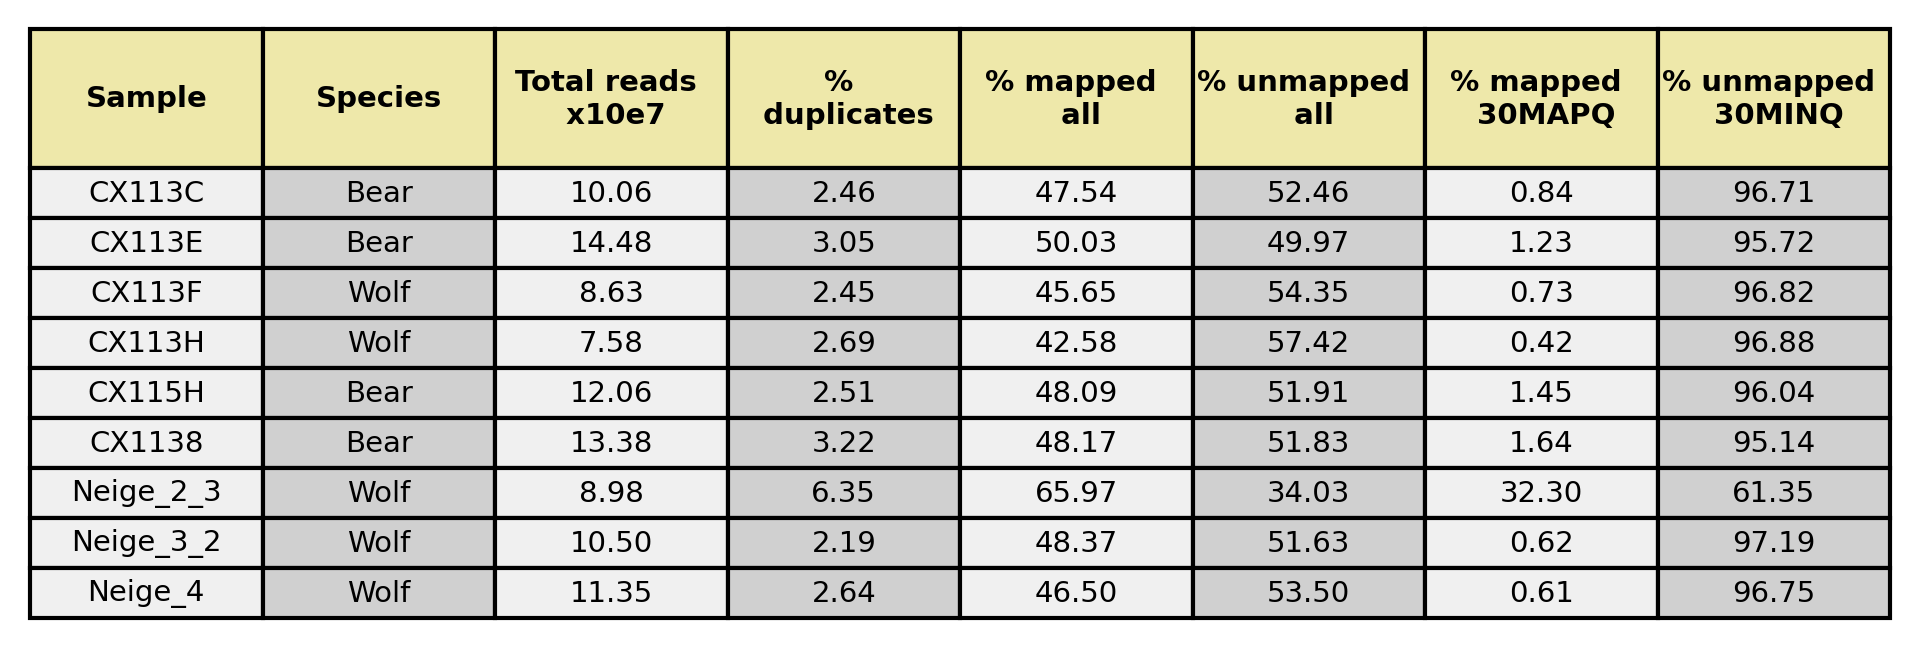

In [6]:
#### visualise table
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 2), dpi=300)  # High resolution
ax.set_frame_on(False)  # Remove the figure frame
ax.xaxis.set_visible(False)  # Hide x-axis
ax.yaxis.set_visible(False)  # Hide y-axis

# Create a table
table = ax.table(
    cellText=table_df.values,
    colLabels=table_df.columns,
    cellLoc='center',
    loc='center',
    colColours=["palegoldenrod"] * table_df.shape[1]  # Header background color
)

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(7)
table.auto_set_column_width(15)  # Adjust column width

# Make headers bold
for i in range(len(table_df.columns)):
    cell = table[0, i]
    cell.set_text_props(weight='bold')
    cell = table[0, i]
    cell.set_text_props(weight='bold')
    cell.set_height(0.3)  # Increase the height of the header row

# Alternate column colors
for col in range(table_df.shape[1]):  # Loop through columns
    color = '#f0f0f0' if col % 2 == 0 else '#d0d0d0'  # Alternating greys
    for row in range(1, table_df.shape[0] + 1):  # +1 to include headers
        cell = table[(row, col)]
        cell.set_facecolor(color)

# Save as high-quality image
plt.savefig("./figures/single/stats_table_single.png", bbox_inches="tight", dpi=300)
plt.show()